In [1]:
#Different ndarrays can share the same data, so that changes made in one ndarray
#may be visible in another. That is, an ndarray can be a "view" to another ndarray.

In [5]:
#slicing can produce views of the array.
import numpy as np
x=np.array(np.arange(1,7)).reshape(2,3)

In [6]:
x

array([[1, 2, 3],
       [4, 5, 6]])

In [12]:
y=x[:1] #the y is a view 
y.base  # we could see that y is refering to the parent (X) hence any modification 
#done to Y reflects in x.

array([1, 2, 3, 4, 5, 6])

In [15]:
y[0]+=12  #(you could see the change)
x

array([[25, 26, 27],
       [ 4,  5,  6]])

# Array Attributes

### Memory Layout

The below attributes contain information about the memory layout of the array

In [16]:
x.flags 

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [17]:
x.shape, x.strides, x.ndim, x.data, x.size, x.itemsize, x.base

((2, 3),
 (12, 4),
 2,
 6,
 4,
 array([25, 26, 27,  4,  5,  6]))

In [18]:
x.strides #(gives you the bytes to step in each dimension when traversing an array)

(12, 4)

In [19]:
x.dtype

dtype('int32')

In [21]:
x.T  #Transpose Array

array([[25,  4],
       [26,  5],
       [27,  6]])

In [23]:
x.real  #(Real part of the array) not the imaginary part 


array([[25, 26, 27],
       [ 4,  5,  6]])

In [24]:
x.imag   # no imaginary part hence it gives you 0,0 etc...

array([[0, 0, 0],
       [0, 0, 0]])

In [34]:
x.flat[4]  #To flat and view you have to go by indexing

5

### Array Methods

In [35]:
x.all

<function ndarray.all>

In [36]:
https://cs231n.github.io/python-numpy-tutorial/

https://numpy.org/doc/stable/reference/arrays.ndarray.html#array-methods

SyntaxError: invalid syntax (895403196.py, line 1)

### Array Conversion

In [1]:
import numpy as np
alp=np.array([1,2,34,5,5676])
alp

array([   1,    2,   34,    5, 5676])

##### nd.array.item (returns a scalar which is an optimized way of accessing elements of the array)

In [3]:
lp=np.random.randint(9,size=(3,3))
lp

array([[5, 7, 6],
       [1, 0, 5],
       [1, 6, 4]])

In [5]:
lp.item(8)

4

In [6]:
lp.item((0,1))

7

##### ndarray.tolist() returns the array as an ndim- level deep nested list of python scalars

In [8]:
my_arr=np.arange(12).reshape(3,4)
print(my_arr)
print('---------')
print(my_arr.tolist())    #converting the numpy array into the python list

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
---------
[[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]]


##### ndarray.itemset() ~ similar to ndarray[args]= value but the itemset function is an optimized method

In [17]:
itemse=np.random.randint(9,size=(4,4))
itemse.itemset(4,100)  #this says the code to place 100 in 4th index place
itemse

array([[  1,   4,   6,   1],
       [100,   5,   2,   7],
       [  6,   1,   4,   7],
       [  5,   6,   0,   7]])

In [18]:
itemse.itemset((2,2),90)
itemse   #the other way which looks better at reading the code
#place the 90 at the location 2X2

array([[  1,   4,   6,   1],
       [100,   5,   2,   7],
       [  6,   1,  90,   7],
       [  5,   6,   0,   7]])

In [ ]:
# tostring method is deprecated instead tobytes method is added

#### ndarray.tobytes is not neccessarry

#### ndarray.tofile       write array to a file as text or binary data produced by this method can be recovered using the function fromfile()

In [19]:
file_write=np.array([1,300])
file_write.tofile('trail.csv')

In [21]:
with open('trail.csv','rb') as x:
    print(x.read())

b'\x01\x00\x00\x00,\x01\x00\x00'


#### ndarray.dump  dump a pickle of the array to the specified file. The array can be read back with the pickle.load or numpy.load

In [39]:
picklepath='./dumpmethod.pkl'
array_2d=np.arange(12).reshape(4,3)
array_2d.dump(picklepath)
array_2d

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [37]:
arrayfrompickle=np.load(picklepath, allow_pickle=True)
print(type(arrayfrompickle))

<class 'numpy.ndarray'>


In [38]:
arrayfrompickle  

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

#### ndarray.dumps this method doesnt require the long process as dump method

In [47]:
dumper=np.random.randint(9,size=(3,3))
mydump=dumper.dumps()

In [48]:
mydump

b'\x80\x02cnumpy.core.multiarray\n_reconstruct\nq\x00cnumpy\nndarray\nq\x01K\x00\x85q\x02c_codecs\nencode\nq\x03X\x01\x00\x00\x00bq\x04X\x06\x00\x00\x00latin1q\x05\x86q\x06Rq\x07\x87q\x08Rq\t(K\x01K\x03K\x03\x86q\ncnumpy\ndtype\nq\x0bX\x02\x00\x00\x00i4q\x0c\x89\x88\x87q\rRq\x0e(K\x03X\x01\x00\x00\x00<q\x0fNNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00tq\x10b\x89h\x03X$\x00\x00\x00\x06\x00\x00\x00\x08\x00\x00\x00\x06\x00\x00\x00\x05\x00\x00\x00\x07\x00\x00\x00\x06\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x02\x00\x00\x00q\x11h\x05\x86q\x12Rq\x13tq\x14b.'

In [49]:
dumper

array([[6, 8, 6],
       [5, 7, 6],
       [0, 3, 2]])

In [50]:
import pickle
pickle.load(dumper)

TypeError: file must have 'read' and 'readline' attributes

#### numpy.ndarray.astype    copy of the array, cast to a specified type

In [54]:
x= np.array([1,2,23.73])
x

array([ 1.  ,  2.  , 23.73])

In [55]:
x.astype(int)

array([ 1,  2, 23])

#### ndarray.copy   return a copy of the array( any changes made to the original or copied array will not gonna effect the other)

In [57]:
cop=np.arange(10).reshape(5,2)
cop

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [58]:
holy_new=cop.copy()
holy_new[0]=1213
holy_new

array([[1213, 1213],
       [   2,    3],
       [   4,    5],
       [   6,    7],
       [   8,    9]])

In [59]:
cop

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

#### ndarray.view we already know abt this and the difference b/n view and copy method

#### ndarray.getfield  returns a field of the given array (field is a view of the array data with a given data-type)


Field is a view of the array data with a given data-type. the values in the view are determined by the given type and the offset into the current array in bytes.

In [1]:
import numpy as np
x=np.diag([1.+1.j]*2)
x

array([[1.+1.j, 0.+0.j],
       [0.+0.j, 1.+1.j]])

In [3]:
x[1,1]=2+4.j
x

array([[1.+1.j, 0.+0.j],
       [0.+0.j, 2.+4.j]])

In [4]:
x.getfield(np.float64)

array([[1., 0.],
       [0., 2.]])

## ndarray.setflags

Array flags provide information about how the memory area used for the array is to be interpreted. 
<br>writeable (W) :- data area can be written to;
<br>aligned (A) :- the data and strides are aligned appropriately for the hardware.
writebackifcopy(X) :-

In [6]:
x.flags   #If we want to change the flag values use the set value function

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [7]:
x.setflags(write=0, align=0)
x.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : False
  ALIGNED : False
  WRITEBACKIFCOPY : False

## ndarray.fill  complete array fill
fills the <b>array</b> with a scalar value.

In [8]:
a= np.array([1,2])
a.fill(0)
a

array([0, 0])

In [12]:
alfill=np.empty(7)
alfill

array([6.23042070e-307, 4.67296746e-307, 1.69121096e-306, 1.11260280e-306,
       1.89146896e-307, 7.56571288e-307, 3.14082867e-317])

In [14]:
alfill.fill(6)
alfill

array([6., 6., 6., 6., 6., 6., 6.])

In [15]:
p=np.random.randint(9,size=(3,3))
p                

array([[3, 2, 2],
       [2, 3, 1],
       [2, 7, 5]])

In [16]:
p.fill('32')

In [17]:
p

array([[32, 32, 32],
       [32, 32, 32],
       [32, 32, 32]])

In [18]:
p.dtype

dtype('int32')

## Shape Manipulation

In [19]:
# .reshape, .resize and difference
x=np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
x.reshape(5,2)

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [21]:
x   #reshape doesn't modifies the original array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
x.resize(2,5)

In [24]:
x  #but resize changes the original array.

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [26]:
x.transpose()  #To transpose

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

### np.swapaxes   (Interchange 2 axes of an array)

In [71]:
x

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [72]:
np.swapaxes(x,0,1)

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

In [73]:
swaaxes=np.arange(12).reshape(2,3,2)
swaaxes

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

In [44]:
swaaxes.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [74]:
swaaxes

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

In [53]:
np.swapaxes(swaaxes,0,1)

#0,1  0,2  1,2

array([[[ 0,  1],
        [ 6,  7]],

       [[ 2,  3],
        [ 8,  9]],

       [[ 4,  5],
        [10, 11]]])

In [75]:
np.swapaxes(swaaxes,0,2)

array([[[ 0,  6],
        [ 2,  8],
        [ 4, 10]],

       [[ 1,  7],
        [ 3,  9],
        [ 5, 11]]])

In [56]:
swaaxes.swapaxes(1,2)

array([[[ 0,  2,  4],
        [ 1,  3,  5]],

       [[ 6,  8, 10],
        [ 7,  9, 11]]])

In [57]:
swaaxes.ndim

3

In [59]:
swaaxes

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

### In 3d interpretation of the axis
axis 0 indicates the lowest level (element wise of each stacked matrix)
axis 1 indicates the 2nd least level (directs to the elements in 1 by 1 matrix)
axis 2 indicates the highest level (element row and column wise)

In [67]:
np.sum(swaaxes,axis=0)

array([[ 6,  8],
       [10, 12],
       [14, 16]])

In [68]:
np.sum(swaaxes,axis=1)

array([[ 6,  9],
       [24, 27]])

In [69]:
np.sum(swaaxes,axis=2)

array([[ 1,  5,  9],
       [13, 17, 21]])

In [76]:
swaaxes

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

### Ravel returns a view of the main array whereas the flatten returns a copy use them as per your convinence

In [90]:
alp=swaaxes.flatten()  #this returns a copy of the array collapsed into one dimension
alp

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 19, 10, 11])

In [91]:
alp[9]+=10
alp

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 29, 10, 11])

In [92]:
swaaxes

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8, 19],
        [10, 11]]])

In [93]:
ravl=swaaxes.ravel()
ravl[9]+=10

In [94]:
ravl

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 29, 10, 11])

In [95]:
swaaxes   

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8, 29],
        [10, 11]]])

### Squeeze method removes axes of length one from matrix in the blw examples swaaxes doesn't have a axes of len 1 hence no change is observed

In [118]:
m=np.array([[1],[2],[3]])
m

array([[1],
       [2],
       [3]])

In [119]:
m.shape

(3, 1)

In [120]:
al=np.squeeze(m)
al

array([1, 2, 3])

In [121]:
swaaxes

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8, 29],
        [10, 11]]])

In [122]:
swaaxes.shape

(2, 3, 2)

In [116]:
np.squeeze(swaaxes)

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8, 29],
        [10, 11]]])

# Item selection and Manipulation

#### ndarray.take take elements from an array along an axis
returns an array formed from the elements at the given indices

In [124]:
a=[2,3,45,67]
myarr=np.array(a)
myarr

array([ 2,  3, 45, 67])

In [125]:
myarr.take(0)

2

As the input shape of the indices the resultant array will be generated.

In [129]:
np.take(myarr,[[0,1],[2,3]])

array([[ 2,  3],
       [45, 67]])

In [130]:
myarr.take([[0,1],[2,3]])

array([[ 2,  3],
       [45, 67]])

In [134]:
swaaxes

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8, 29],
        [10, 11]]])

In [138]:
swaaxes.take([0,9])

array([ 0, 29])

#### ndarray.put  replaces specified elements of an array with given values and the indexing works on the flattened target array.

so put is roughly equivalent to a.flat[ind]=v

In [139]:
a=np.arange(5)
a

array([0, 1, 2, 3, 4])

In [140]:
np.put(a,[0,2],[-44,23])
a

array([-44,   1,  23,   3,   4])

In [141]:
als=np.arange(10).reshape(2,5)
als

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [142]:
np.put(als,[0,6],[1212,33])
als

array([[1212,    1,    2,    3,    4],
       [   5,   33,    7,    8,    9]])

### numpy.repeat (repeats each element of an array after themselves)

by default use the flattened input array, and return a flat output array.

In [143]:
np.repeat(3, 4)

array([3, 3, 3, 3])

In [148]:
x = np.array([[1,2],[3,4]])
np.repeat(x, 2)          # as the axis is not mentioned it converts as flatten array
# and repeats after themselves.

array([1, 1, 2, 2, 3, 3, 4, 4])

In [149]:
np.repeat(x, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [150]:
np.repeat(x,3,axis=0)

array([[1, 2],
       [1, 2],
       [1, 2],
       [3, 4],
       [3, 4],
       [3, 4]])

In [151]:
np.repeat(x,3,axis=1)

array([[1, 1, 1, 2, 2, 2],
       [3, 3, 3, 4, 4, 4]])

In [152]:
x

array([[1, 2],
       [3, 4]])

In [153]:
np.repeat(x, [1, 1], axis=0)

array([[1, 2],
       [3, 4]])

In [155]:
np.repeat(x, [2, 1], axis=0)  #the 2,1 indicates each element in the x how many times need to be repeated
# first 2 indicates that the index 0 element should repeat for 2 times
# whereas the 1 indicates the index 1 element repeat for 1 time

array([[1, 2],
       [1, 2],
       [3, 4]])

In [161]:
np.repeat(x,[1,2],axis=1)  # column wise 2nd element repeat for 2 times

array([[1, 2, 2],
       [3, 4, 4]])

In [160]:
np.repeat(x,[1,2],axis=0)  #The axis 0 indicates row wise 2nd element repeat for 2 times

array([[1, 2],
       [3, 4],
       [3, 4]])

#### ndarray.choose 

### ndarray.sort() sort an array inplace (even the elements might change their positions)

In [163]:
a= np.array([[1,4],[3,1]])
a.sort(axis=1)
a

array([[1, 4],
       [1, 3]])

In [165]:
a.sort(axis=0)
a

array([[1, 3],
       [1, 4]])

In [171]:
nipu=np.array([[5,2],[3,4]])
nipu.sort(axis=0)
nipu

array([[3, 2],
       [5, 4]])

In [172]:
nipu=np.array([[5,2],[3,1]])
nipu.sort(axis=0)
nipu

array([[3, 1],
       [5, 2]])

In [173]:
nipu.sort(axis=1)
nipu

array([[1, 3],
       [2, 5]])

### Applying sort method on Structured Array 

In [ ]:
a = np.array([('a', 2), ('c', 1)], dtype=[('x', 'S1'), ('y', int)])
a.sort(order='y')
a

### Argsort 

Returns the indices that would sort an array.

Perform an indirect sort along the given axis using the algorithm specified by the kind keyword. It returns an array of indices of the same shape as a that index data along the given axis in sorted order.

In [175]:
my_ar=np.array([2,1,3])
my_ar.argsort()  #returns the list of indices of the elements

array([1, 0, 2], dtype=int64)

In [176]:
x=np.array([[0,3],[2,2]])
x

array([[0, 3],
       [2, 2]])

In [177]:
x.argsort()

array([[0, 1],
       [0, 1]], dtype=int64)

In [178]:
np.argsort(x)

array([[0, 1],
       [0, 1]], dtype=int64)

In [180]:
x.argsort(axis=1)

array([[0, 1],
       [0, 1]], dtype=int64)

In [191]:
my_aew=np.array([[21,7],[10,3]])
my_aew

array([[21,  7],
       [10,  3]])

In [194]:
my_aew.argsort(axis=0)  #row wise comparison will be done so here
# 21 is compared with 10 similarly 7 is compared with 3

array([[1, 1],
       [0, 0]], dtype=int64)

In [195]:
my_aew.argsort(axis=1)
# column wise comparison is done here
# we compate 21 with 7 and 10 with 3.

array([[1, 0],
       [1, 0]], dtype=int64)

#### Partition method  
ndarray.partition(kth, axis, order= none)

<br>Rearranges the elements in the array in such a way that the value of the element in kth position is in the position it would be in a sorted array. All elements smaller than the kth element are moved before this element and all equal or greater are moved behind it.

Argpartition

#### SearchSorted find indices where elements should be inserted to maintain order.

In [197]:
np.searchsorted([1,2,3,4],0)  #this means 0 can be a good fit at location 0

0

In [203]:
np.searchsorted([1,2,9],[-10,10,2,3])

#Got it this doesn't make the next elements in the second list to know that
#there is already a number

array([0, 3, 1, 2], dtype=int64)

In [205]:
np.searchsorted([1,2,9],[-10,10,1,3])

#you could see for -10 it is 0 and
#for '1' it is index 0 which indicates that, they are not bothering about the other element in the second array

array([0, 3, 0, 2], dtype=int64)

### Non zero function 

In [206]:
x

array([[0, 3],
       [2, 2]])

In [208]:
x.nonzero()  # 0,1,1 indicates in the 0th row numbers are at location 1
# 2nd output array 1,0,1 indicates in the 1st row (2nd row) non zeros are located at index 0,1

(array([0, 1, 1], dtype=int64), array([1, 0, 1], dtype=int64))

### Diagonal  return specified diagonals.

In [209]:
a = np.arange(4).reshape(2,2)
a

array([[0, 1],
       [2, 3]])

In [210]:
a.diagonal()

array([0, 3])

In [215]:
a.diagonal(1)

array([1])

In [217]:
a = np.arange(8).reshape(2,2,2)
a

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

#### Calculation

In [1]:
import numpy as np

In [2]:
x=np.arange(27).reshape(3,3,3)
x

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [3]:
x.sum(axis=0)

array([[27, 30, 33],
       [36, 39, 42],
       [45, 48, 51]])

In [4]:
x.sum(axis=1)

array([[ 9, 12, 15],
       [36, 39, 42],
       [63, 66, 69]])

In [5]:
x.sum(axis=2)

array([[ 3, 12, 21],
       [30, 39, 48],
       [57, 66, 75]])

#### ndarray.max returns the max value present in the given axis (if none searches for the whole array and produces the result)

In [7]:
x.max(), x.max(axis=0)

(26,
 array([[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]))

In [9]:
x.argmax()   #It returns the index of the maximum value in the given array

26

In [10]:
myatrix=np.random.randint(2,40,size=(3,3,3))
myatrix

array([[[33, 24, 10],
        [13, 24, 21],
        [ 4, 29, 27]],

       [[35, 17, 30],
        [11, 17, 28],
        [18, 22, 24]],

       [[26, 25, 30],
        [31,  9, 22],
        [ 8, 14, 33]]])

### np.argmax 

In [12]:
myatrix.max(),myatrix.argmax()   #at tthe index 9 (which is 35 above is the maximum value)


(35, 9)

In [13]:
myatrix.argmax(axis=0)

array([[1, 2, 1],
       [2, 0, 1],
       [1, 0, 2]], dtype=int64)

### min, argmin goes the same way as these max functions does.

### ndarray.ptp (peak to peak) [Maximum to minimum]

In [16]:
myatrix.min(), myatrix.max()

(4, 35)

In [17]:
myatrix.ptp()

31

#### ndarray.clip()  return an array whose values are limited to the arguments passed bascially it limit the values in an array.

In [18]:
homie=np.arange(10)
homie

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
homie.clip(1,8)  #I am asking the numpy to limit the entries between 1 and 8

array([1, 1, 2, 3, 4, 5, 6, 7, 8, 8])

In [21]:
homie.clip(7,5)   # clip(min, max) is basic argmuent pattern
#If the max<min the clip returns an array in which all values are equal to max


array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [24]:
homie.clip(5,7)   #elements before 5 gets converted into 5
#elements after 7 gets converted into 7.
#rest (elements between the peaks will remain same)

array([5, 5, 5, 5, 5, 5, 6, 7, 7, 7])

#### conj (complex conjugate) related to the maths field (when + is given it turns down into - , and when - is given it turns into +)  both conj and conjugate methods returns the same output.

In [32]:
ma=np.eye(2)+1j*np.eye(2)
ma.conj(), ma.conjugate()

(array([[1.-1.j, 0.-0.j],
        [0.-0.j, 1.-1.j]]),
 array([[1.-1.j, 0.-0.j],
        [0.-0.j, 1.-1.j]]))

##### The below one we have to find out whether it is true or not and we have to grab info from it.

In [33]:
ma=np.eye(2)-1j*np.eye(2)
ma.conj()

array([[1.+1.j, 0.-0.j],
       [0.-0.j, 1.+1.j]])

#### numpy.around and np.round (rounds array to the given number of decimals)

#### np.around always tries to round to the nearest even integer.

In [37]:
alp=np.random.rand(10).reshape(5,2)
alp

array([[0.91809791, 0.8692646 ],
       [0.66363459, 0.74649367],
       [0.08221324, 0.63224769],
       [0.92182042, 0.76589318],
       [0.966738  , 0.44508581]])

In [38]:
alp.round()

array([[1., 1.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [1., 0.]])

In [40]:
alp.round(decimals=2)

array([[0.92, 0.87],
       [0.66, 0.75],
       [0.08, 0.63],
       [0.92, 0.77],
       [0.97, 0.45]])

In [45]:
#for values exactly halfway between rounded decimal values, numpy rounds to the nearest
# even value. thus 11.5 turns to 12
res=np.array([12.324, 11.5])  
res.round()

array([12., 12.])

#### ndarray.trace      returns the sum along diagonals of the array

In [46]:
np.trace(np.eye(3))

3.0

In [53]:
ms=np.arange(8).reshape(2,2,2)
print(ms)
ms.trace(axis1=1,axis2=2)

[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]


array([ 3, 11])

In [54]:
ms.trace()

array([6, 8])

In [50]:
news=np.arange(9).reshape(3,3)
news

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [51]:
news.trace()

12

In [67]:
las=np.random.randint(3,10,size=(2,2,2))
las

array([[[6, 7],
        [8, 9]],

       [[4, 6],
        [3, 5]]])

In [68]:
las.trace()

array([ 9, 12])

In [69]:
las=np.random.randint(3,10,size=(3,3,3))
las

array([[[7, 8, 8],
        [6, 5, 6],
        [4, 8, 9]],

       [[4, 5, 9],
        [8, 6, 7],
        [6, 4, 7]],

       [[5, 9, 9],
        [3, 8, 7],
        [7, 5, 8]]])

In [74]:
las.trace(axis1=1,axis2=2)

array([21, 17, 21])

In [76]:
las.trace()

array([22, 19, 23])

#### sum method returns the sum of the array elements over the given axis


#### cumsum() returns cummilative sum of the elements along a given axis

In [77]:
las

array([[[7, 8, 8],
        [6, 5, 6],
        [4, 8, 9]],

       [[4, 5, 9],
        [8, 6, 7],
        [6, 4, 7]],

       [[5, 9, 9],
        [3, 8, 7],
        [7, 5, 8]]])

In [85]:
las.cumsum(axis=0)

array([[[ 7,  8,  8],
        [ 6,  5,  6],
        [ 4,  8,  9]],

       [[11, 13, 17],
        [14, 11, 13],
        [10, 12, 16]],

       [[16, 22, 26],
        [17, 19, 20],
        [17, 17, 24]]])

In [82]:
las

array([[[7, 8, 8],
        [6, 5, 6],
        [4, 8, 9]],

       [[4, 5, 9],
        [8, 6, 7],
        [6, 4, 7]],

       [[5, 9, 9],
        [3, 8, 7],
        [7, 5, 8]]])

In [84]:
las.cumsum(axis=1)

array([[[ 7,  8,  8],
        [13, 13, 14],
        [17, 21, 23]],

       [[ 4,  5,  9],
        [12, 11, 16],
        [18, 15, 23]],

       [[ 5,  9,  9],
        [ 8, 17, 16],
        [15, 22, 24]]])

In [83]:
las

array([[[7, 8, 8],
        [6, 5, 6],
        [4, 8, 9]],

       [[4, 5, 9],
        [8, 6, 7],
        [6, 4, 7]],

       [[5, 9, 9],
        [3, 8, 7],
        [7, 5, 8]]])

In [81]:
las.cumsum(axis=2)

array([[[ 7, 15, 23],
        [ 6, 11, 17],
        [ 4, 12, 21]],

       [[ 4,  9, 18],
        [ 8, 14, 21],
        [ 6, 10, 17]],

       [[ 5, 14, 23],
        [ 3, 11, 18],
        [ 7, 12, 20]]])

# Whenever you come across the axis 0,1,2 (recall a dice and it works in that way)' place each matrix back of each other. when axis=0 go deeper       when axis=1 go with y axis   when axis=2 go along the horizontal axis

### mean, std, var, prod, like cumsum cumprod works im not gonna write examples down here

In [87]:
las.mean()

6.592592592592593

In [88]:
las.mean(axis=0)

array([[5.33333333, 7.33333333, 8.66666667],
       [5.66666667, 6.33333333, 6.66666667],
       [5.66666667, 5.66666667, 8.        ]])

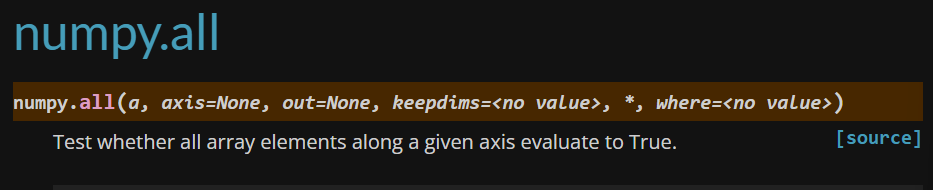

where: array_like of bool, 
elements to include in checking for all True values

#### ndarray.all() returns true if all elements evaluate to True. Test whether all array elements along a given axis evaluate to True.

Not a number (NaN), positive infinity and negative infinity evaluate to True bcuz these are <> 0.

In [89]:
np.all([[True,False],[True,True]])

False

In [90]:
np.all([[True,False],[True,True]], axis=0)

array([ True, False])

In [91]:
np.all([-1, 4, 5])


True

In [92]:
np.all([[True, True], [False, True]], where=[[True], [False]])

True

#### ndarray.any similar to all but instead of checking with all we limit with any match

In [93]:
np.any([[True, False], [True, True]])

True

In [97]:
np.any([[True, False], [True, True]], axis=0)

array([ True,  True])

In [98]:
np.any([[True, False], [True, True]], axis=0)

array([ True,  True])

In [99]:
np.any([[True, False], [False, False]], axis=0)

array([ True, False])

### The below cell has to be looked after

In [100]:
np.any([[True, False], [False, False]], where=[[False], [True]])

False

# Iterating over arrays 

In [102]:
a=np.arange(6).reshape(2,3)
for x in np.nditer(a):
    print(x,end=' ')

0 1 2 3 4 5 

# np.matrix 

In [103]:
a=np.matrix('1 2; 3 4')
a

matrix([[1, 2],
        [3, 4]])

In [104]:
a.A1

array([1, 2, 3, 4])

In [106]:
a.H  # Returns the complex conjugate transpose of self

matrix([[1, 3],
        [2, 4]])

In [107]:
a.I  # returns mulitplicative inverse of invertible self

matrix([[-2. ,  1. ],
        [ 1.5, -0.5]])

In [108]:
a.T

matrix([[1, 3],
        [2, 4]])

In [109]:
a.base

array([[1, 2],
       [3, 4]])

In [111]:
a.data, a.flags

(<memory at 0x000001B717DAEB50>,
   C_CONTIGUOUS : True
   F_CONTIGUOUS : False
   OWNDATA : False
   WRITEABLE : True
   ALIGNED : True
   WRITEBACKIFCOPY : False)